In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
df = pd.read_excel('emissions_data_saved.xlsx')
format = '%Y-%m-%d %H:%M:%S'
df['Datetime'] = pd.to_datetime(df['point_time'], format=format)
df = df.set_index(pd.DatetimeIndex(df['Datetime']))
df.to_pickle('emissions_data')
# df = pd.read_pickle('emissions_data')
df = df.drop(['point_time', 'version_moer', 'freq','version_forecast'], axis=1)
df['hour'] = df['time'].str.slice(0, 2)
df = df.sort_index(ascending=True)

In [2]:
print(df)

                     Year  Month  Day      time  realtime_value  \
Datetime                                                          
2021-01-01 00:05:00  2021      1    1  00:05:00        0.385372   
2021-01-01 00:10:00  2021      1    1  00:10:00        0.387548   
2021-01-01 00:15:00  2021      1    1  00:15:00        0.409663   
2021-01-01 00:20:00  2021      1    1  00:20:00        0.443810   
2021-01-01 00:25:00  2021      1    1  00:25:00        0.475358   
...                   ...    ...  ...       ...             ...   
2022-12-01 23:40:00  2022     12    1  23:40:00        0.608348   
2022-12-01 23:45:00  2022     12    1  23:45:00        0.568489   
2022-12-01 23:50:00  2022     12    1  23:50:00        0.625176   
2022-12-01 23:55:00  2022     12    1  23:55:00        0.620240   
2022-12-02 00:00:00  2022     12    2  00:00:00        0.568719   

                     forecast_value  relative_delta  real_forecast  \
Datetime                                                  

Maxmim Delta Error 0.5679220702796736
Minimum Delta Error -0.5871205528888152
Mean Delta Error 0.006623807618835503


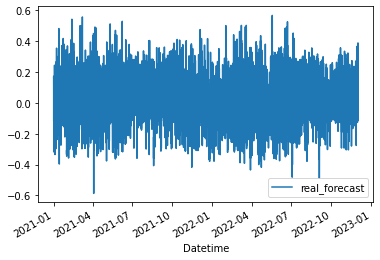

In [4]:
df['real_forecast'].plot(legend=True)

print("Maxmim Delta Error", np.max(df['real_forecast']))
print("Minimum Delta Error", np.min(df['real_forecast']))
print("Mean Delta Error", np.mean(df['real_forecast']))

<AxesSubplot:xlabel='Datetime'>

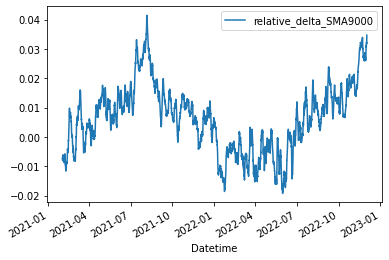

In [8]:
df['relative_delta_SMA9000'] = df['real_forecast'].rolling(9000).mean()
df['relative_delta_SMA9000'].plot(legend=True)

<BarContainer object of 12 artists>

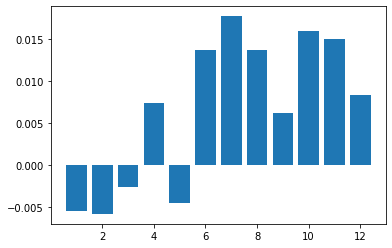

In [9]:
summary_month = df.groupby(['Month']).agg({'real_forecast': ['mean', 'count']})
plt.bar(summary_month.index, summary_month['real_forecast']['mean'])

<BarContainer object of 24 artists>

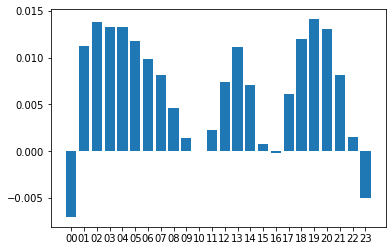

In [10]:
summary_hour = df.groupby(['hour']).agg({'real_forecast': ['mean', 'count']})
plt.bar(summary_hour.index, summary_hour['real_forecast']['mean'])

In [ ]:
# seperate into hours of the days
emissions_1 = df.between_time('00:00', '01:00')
print('emissions_1')
print(emissions_1)
emissions_2 = df.between_time('01:00', '02:00')
print('emissions_2')
print(emissions_2)
emissions_3 = df.between_time('02:00', '03:00')
print('emissions_3')
print(emissions_3)
emissions_4 = df.between_time('03:00', '04:00')
print('emissions_4')
print(emissions_4)
emissions_5 = df.between_time('04:00', '05:00')
print('emissions_5')
print(emissions_5)
emissions_6 = df.between_time('05:00', '06:00')
print('emissions_6')
print(emissions_6)
emissions_7 = df.between_time('06:00', '07:00')
print('emissions_7')
print(emissions_7)
emissions_8 = df.between_time('07:00', '08:00')
print('emissions_8')
print(emissions_8)
emissions_9 = df.between_time('08:00', '09:00')
print('emissions_9')
print(emissions_9)
emissions_10 = df.between_time('09:00', '10:00')
print('emissions_10')
print(emissions_10)
emissions_11 = df.between_time('10:00', '11:00')
print('emissions_11')
print(emissions_11)
emissions_12 = df.between_time('11:00', '12:00')
print('emissions_12')
print(emissions_12)
emissions_13 = df.between_time('12:00', '13:00')
print('emissions_13')
print(emissions_13)
emissions_14 = df.between_time('13:00', '14:00')
print('emissions_14')
print(emissions_14)
emissions_15 = df.between_time('14:00', '15:00')
print('emissions_15')
print(emissions_15)
emissions_16 = df.between_time('15:00', '16:00')
print('emissions_16')
print(emissions_16)
emissions_17 = df.between_time('16:00', '17:00')
print('emissions_17')
print(emissions_17)
emissions_18 = df.between_time('17:00', '18:00')
print('emissions_18')
print(emissions_18)
emissions_19 = df.between_time('18:00', '19:00')
print('emissions_19')
print(emissions_19)
emissions_20 = df.between_time('19:00', '20:00')
print('emissions_20')
print(emissions_20)
emissions_21 = df.between_time('20:00', '21:00')
print('emissions_21')
print(emissions_21)
emissions_22 = df.between_time('21:00', '22:00')
print('emissions_22')
print(emissions_22)
emissions_23 = df.between_time('22:00', '23:00')
print('emissions_23')
print(emissions_23)
emissions_24 = df.between_time('23:00', '00:00')
print('emissions_24')
print(emissions_24)


In [ ]:
# Using Seasons
emissions_winter = df[((df['Datetime'].dt.month == 12))]
emissions_winter = emissions_winter.append(df[df['Datetime'].dt.month == 1])
emissions_winter = emissions_winter.append(df[df['Datetime'].dt.month == 2])
emissions_winter = emissions_winter.sort_index(ascending=True)
print('emissions_winter')
print(emissions_winter)

emissions_spring = df[((df['Datetime'].dt.month == 3))]
emissions_spring = emissions_spring.append(df[df['Datetime'].dt.month == 4])
emissions_spring = emissions_spring.append(df[df['Datetime'].dt.month == 5])
print('emissions_spring')
print(emissions_spring)

emissions_summer = df[((df['Datetime'].dt.month == 6))]
emissions_summer = emissions_summer.append(df[df['Datetime'].dt.month == 7])
emissions_summer = emissions_summer.append(df[df['Datetime'].dt.month == 8])
print('emissions_summer')
print(emissions_summer)

emissions_fall = df[((df['Datetime'].dt.month == 9))]
emissions_fall = emissions_fall.append(df[df['Datetime'].dt.month == 10])
emissions_fall = emissions_fall.append(df[df['Datetime'].dt.month == 11])
print('emissions_fall')
print(emissions_fall)

emissions_winter
                         moer     value            Datetime
Datetime                                                   
2021-01-01 00:00:00  0.401241       NaN 2021-01-01 00:00:00
2021-01-01 00:05:00  0.385372  0.499777 2021-01-01 00:05:00
2021-01-01 00:10:00  0.387548  0.457911 2021-01-01 00:10:00
2021-01-01 00:15:00  0.409663  0.439068 2021-01-01 00:15:00
2021-01-01 00:20:00  0.443810  0.428730 2021-01-01 00:20:00
...                       ...       ...                 ...
2022-12-01 23:40:00  0.608348  0.472865 2022-12-01 23:40:00
2022-12-01 23:45:00  0.568489  0.492736 2022-12-01 23:45:00
2022-12-01 23:50:00  0.625176  0.503279 2022-12-01 23:50:00
2022-12-01 23:55:00  0.620240  0.508819 2022-12-01 23:55:00
2022-12-02 00:00:00  0.568719  0.419576 2022-12-02 00:00:00

[43061 rows x 3 columns]
emissions_spring
                         moer     value            Datetime
Datetime                                                   
2021-03-01 00:00:00  0.010375  0.114089 

C:\Users\thyan\AppData\Local\Temp\ipykernel_37300\3282986366.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emissions_winter = emissions_winter.append(df[df['Datetime'].dt.month == 1])
C:\Users\thyan\AppData\Local\Temp\ipykernel_37300\3282986366.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emissions_winter = emissions_winter.append(df[df['Datetime'].dt.month == 2])
C:\Users\thyan\AppData\Local\Temp\ipykernel_37300\3282986366.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emissions_spring = emissions_spring.append(df[df['Datetime'].dt.month == 4])
C:\Users\thyan\AppData\Local\Temp\ipykernel_37300\3282986366.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futur